In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
import heapq

In [2]:
# Load and process the heart dataset 
data = pd.read_csv("heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

In [3]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex", "HeartDisease","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df[filtered_df.columns.drop(['HeartDisease'])].values
y = filtered_df['HeartDisease'].values

In [4]:
#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def distance(p, q):
    return np.linalg.norm(p - q)
	
def k_nearest_neighbors(point, training_features, training_labels, k):
	# Max-heap to store the k closest neighbors
	heap = []

	i = 0
	for p, label in zip(training_features, training_labels):
		# print(p)
		d = distance(point, p)
		# Use -d to simulate a max-heap (since heapq is min-heap by default)
		if len(heap) < k:
			heapq.heappush(heap, (-d, i, label, 1))
		else:
			heapq.heappush(heap, (-d, i, label, 1))
			heapq.heappop(heap)
		i+=1
	# Convert back to (point, label, distance) format
	return [(p, label, -neg_d) for (neg_d, i, label, p) in heap]



def KNN_Predict(point,
				training_features,
				training_labels,
				k,
				regression = False):
	neighbors = k_nearest_neighbors(point,
								   training_features,
								   training_labels,
								   k)
	
	if regression == False:
		labels = [x[1] for x in neighbors]
		return max(labels, key = labels.count)
	
	else:
		return sum(x[1] for x in neighbors)/k

In [11]:
# Make predictions
k=3# number of neighbors to consider
y_pred = np.array([KNN_Predict(x, X_train, y_train, k, regression=True) for x in X_test])

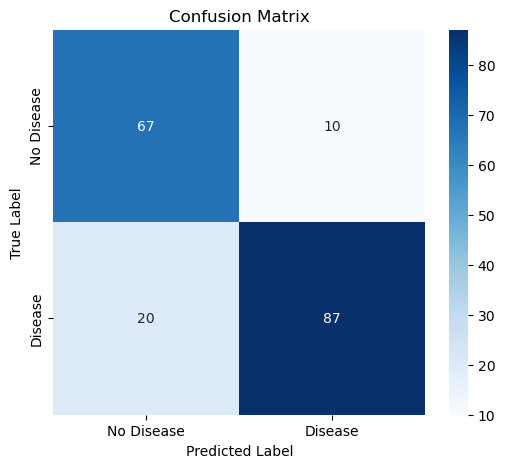

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.87      0.82        77
     Disease       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [14]:
y_pred_class = (y_pred >= 0.5).astype(int)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_class, target_names=['No Disease', 'Disease']))


In [13]:
# Compute MSE
mse = mean_squared_error(y_test, y_pred_class)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1630
